In [1]:
import pandas as pd
import numpy as np

In [185]:
df = pd.read_csv('/home/user/Module1.csv')

In [22]:
df.head()

,Unnamed: 0,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,temp,vwap,Day_Perc_Change,Trend
0,375,2018-04-30,1018.58,1034.42,1038.37,1018.30,1.72,Apr,2018,Apr-2018,1018.5800,0.000000,Slight or No Change
1,376,2018-04-27,1031.45,1045.54,1051.69,1027.59,2.04,Apr,2018,Apr-2018,1025.5627,1.263523,Positive
2,377,2018-04-26,1043.31,1033.22,1052.02,1020.45,2.55,Apr,2018,Apr-2018,1032.7349,1.149845,Positive
3,378,2018-04-25,1022.99,1029.75,1036.07,1017.01,2.89,Apr,2018,Apr-2018,1029.6737,-1.947653,Negative
4,379,2018-04-24,1022.64,1059.20,1064.49,1012.86,6.41,Apr,2018,Apr-2018,1026.7855,-0.034213,Slight or No Change


In [24]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [25]:
df['ub'] = df['Close Price'].rolling(14).mean() + 2*df['Close Price'].rolling(14).std()
df['lb'] = df['Close Price'].rolling(14).mean() - 2*df['Close Price'].rolling(14).std()

In [27]:
df['14-avg'] =  df['Close Price'].rolling(14).mean()

In [28]:
df.isna().sum()

Date                      0
Close Price               0
Open Price                0
High Price                0
Low Price                 0
Total Traded Quantity     0
Month                     0
Year                      0
temp                      0
vwap                      0
Day_Perc_Change           0
Trend                     0
ub                       13
lb                       13
14-avg                   13
dtype: int64

In [33]:
def calc(x):
    if x['Close Price'] <= x['lb']:
        return 'Buy'
    elif x['Close Price'] > x['lb'] and x['Close Price'] < x['14-avg']:
        return 'Hold Buy/Liquidate Short'
    elif x['Close Price'] >= x['14-avg'] and x['Close Price'] < x['ub']:
        return 'Hold Short/Liquidate Buy'
    elif x['Close Price'] >= x['ub']:
        return 'Short'
    else:
        return 0

In [34]:
df['Call'] = 0

In [35]:
df['Call'] = df.apply(calc,axis = 1)

In [38]:
dat = df[13:]

In [40]:
x = dat[['Close Price','14-avg','ub','lb']]
y = dat[['Call']]

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [53]:
from sklearn.metrics import classification_report

In [45]:
from sklearn.preprocessing import LabelEncoder

In [43]:
ss = StandardScaler()

In [44]:
x = ss.fit_transform(x)

In [46]:
le = LabelEncoder()
y = le.fit_transform(y)

/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
train_x,test_x,train_y,test_y = train_test_split(x,y,stratify = y)

In [52]:
rf = RandomForestClassifier()
rf.fit(train_x,train_y)
rf.score(test_x,test_y)

/home/user/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8211382113821138

In [54]:
print(classification_report(test_y,rf.predict(test_x)))

              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.83      0.93      0.88        61
           2       0.82      0.86      0.84        49
           3       0.00      0.00      0.00         6

    accuracy                           0.82       123
   macro avg       0.58      0.52      0.53       123
weighted avg       0.78      0.82      0.79       123



/home/user/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
nn = MLPClassifier()
nn.fit(train_x,train_y)
nn.score(test_x,test_y)

/home/user/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9105691056910569

In [64]:
print(classification_report(test_y,nn.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.90      1.00      0.95        61
           2       0.92      0.96      0.94        49
           3       1.00      0.33      0.50         6

    accuracy                           0.91       123
   macro avg       0.95      0.64      0.71       123
weighted avg       0.92      0.91      0.89       123



In [59]:
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
knn.score(test_x,test_y)

0.8373983739837398

In [60]:
svm = SVC()
svm.fit(train_x,train_y)
svm.score(test_x,test_y)

/home/user/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8699186991869918

In [61]:
print(classification_report(test_y,svm.predict(test_x)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.85      1.00      0.92        61
           2       0.90      0.92      0.91        49
           3       1.00      0.17      0.29         6

    accuracy                           0.87       123
   macro avg       0.69      0.52      0.53       123
weighted avg       0.83      0.87      0.83       123



/home/user/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
d2 = pd.read_csv('/home/user/Desktop/CIPLA.csv')

In [66]:
d2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CIPLA,EQ,15-May-2017,567.95,567.00,572.45,561.00,566.65,569.00,568.17,606569,3.446364e+08,20905,349445,57.61
1,CIPLA,EQ,16-May-2017,569.00,566.65,570.00,564.00,565.70,565.60,565.88,330195,1.868504e+08,13421,166079,50.30
2,CIPLA,EQ,17-May-2017,565.60,565.10,566.00,560.05,561.05,562.35,562.01,895238,5.031284e+08,35003,641507,71.66
3,CIPLA,EQ,18-May-2017,562.35,559.30,564.95,556.80,560.90,560.10,560.16,2155599,1.207477e+09,12636,1862981,86.43
4,CIPLA,EQ,19-May-2017,560.10,561.30,566.65,558.65,564.20,564.95,561.86,685662,3.852487e+08,10878,376701,54.94


In [67]:
d2['ub'] = d2['Close Price'].rolling(14).mean() + 2*d2['Close Price'].rolling(14).std()
d2['lb'] = d2['Close Price'].rolling(14).mean() - 2*d2['Close Price'].rolling(14).std()
d2['14-avg'] =  d2['Close Price'].rolling(14).mean()

In [68]:
d2['Calls'] = 0

In [83]:
d2.dropna(axis = 0,inplace = True)

In [84]:
x = d2[['Close Price','14-avg','ub','lb']]

In [85]:
x = ss.transform(x)

In [87]:
pred = nn.predict(x)

In [88]:
d2['Calls'] = pred

In [92]:
d2['Calls'] = le.inverse_transform(d2['Calls'])

In [95]:
df = pd.read_csv('/home/user/Desktop/HDFC.csv')

In [97]:
df['% OC'] = ((df['Close Price']-df['Open Price'])/df['Open Price'])*100
df['% LH'] = ((df['High Price']-df['Low Price'])/df['Low Price'])*100
df['pct chg'] = df['Close Price'].pct_change()
df.dropna(inplace = True)
df['5-avg'] = df['pct chg'].rolling(5).mean()
df['5-std'] = df['pct chg'].rolling(5).std()

In [99]:
df.dropna(inplace = True)

In [102]:
df['Action'] = 0

In [122]:
df['Action'] =  df['Close Price'].shift(-1) > df['Close Price']

In [130]:
df['Action'].replace(False,-1,inplace = True)

In [132]:
x = df[['% OC','% LH','5-avg','5-std']]
y = df['Action']

In [133]:
x = ss.fit_transform(x)

In [135]:
train_x,test_x,train_y,test_y = train_test_split(x,y,stratify = y)

In [136]:
rf.fit(train_x,train_y)
rf.score(test_x,test_y)

0.9077669902912622

In [137]:
print(classification_report(test_y,rf.predict(test_x)))

              precision    recall  f1-score   support

        -1.0       0.90      0.91      0.91       102
         1.0       0.91      0.90      0.91       104

    accuracy                           0.91       206
   macro avg       0.91      0.91      0.91       206
weighted avg       0.91      0.91      0.91       206



In [186]:
ret = (1+(df['Close Price'].pct_change())).dropna().cumprod()

In [182]:
import matplotlib.pyplot as plt

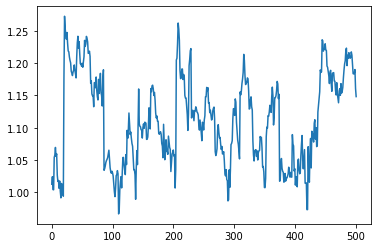

In [188]:
plt.plot(range(len(ret)),ret)